# Linear Regression
Using the scikit sklearn dataset generation, demo linerar regresson with one dependent variable.

All done with gradient decent and back propagation

- Get the data and prepare it
- Fit the model to the data
    - Print each iteration for demo purposes
- Evaluate the model
- Predict values



y-min - y-max 218.65159956026778 - 576.9283139349499
-------- DATA -------
X_train: (80, 1) - float64
y_train: (80,) - float64
X_test: (20, 1) - float64
y_test: (20,) - float64
----------------------
w=[20.29301757] - b=3.962906734854541
w=[35.2349709] - b=6.881589530482929
w=[46.23684434] - b=9.031392170799602
w=[54.33756977] - b=10.615054983345724
w=[60.30213045] - b=11.781859131593452
w=[64.69379662] - b=12.641722884110001
w=[67.92731375] - b=13.275580938127687
w=[70.30806604] - b=13.743026892635061
w=[72.06091306] - b=14.0879405317499
w=[73.35142277] - b=14.342631289509002
w=[74.30150567] - b=14.530889153710456
w=[75.00092655] - b=14.670231098483242
w=[75.51578076] - b=14.773555170928658
w=[75.89473542] - b=14.850358423345105
w=[76.17362497] - b=14.90763369751196
w=[76.37883493] - b=14.950529942263426
w=[76.52979339] - b=14.982838416587963
w=[76.64080559] - b=15.007350689268554
w=[76.72240473] - b=15.026122240127892
w=[76.78234658] - b=15.04066655412417
289.1352683333861
weight=[76

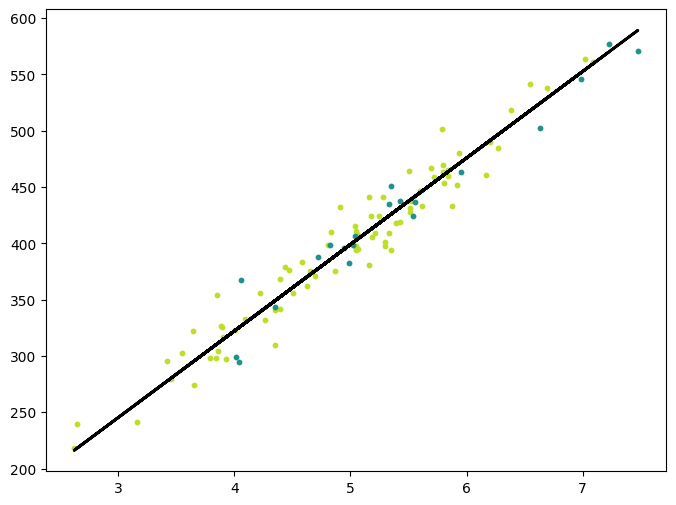

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

###################
# Implementation 
class LinearRegression:

    def __init__(self, lr = 0.00001, n_iters=5):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = 0
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
            print(f"w={self.weights} - b={self.bias}")
    
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred


################
# Explore Dataset and use the regression model

# Generate a random dataset frpm sidekit-learn
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Resape the data with a heigher bias
# This will make the fitting more interesting with the line not passing [0,0] origo
y = y + 400
X = X + 5
print(f"y-min - y-max {y.min()} - {y.max()}")

#Devide into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


print("-------- DATA -------")
print(f"X_train: {X_train.shape} - {X_train.dtype}")
print(f"y_train: {y_train.shape} - {X_train.dtype}")
print(f"X_test: {X_test.shape} - {X_train.dtype}")
print(f"y_test: {y_test.shape} - {X_train.dtype}")

print("----------------------")

reg = LinearRegression(lr=0.01,n_iters=20)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')

print(f"weight={reg.weights} \t bias={reg.bias}")

fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()


